# INSTALLING THE NECESSARY LIBRARIES

In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install scipy
!pip install pickle-mixin
!pip install seaborn
!pip install Flask
!pip install Xgboost

  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5991 sha256=7bedd9321524bf556842f12d176d29734476c285be8a9a5e6e78e8f05f473864
  Stored in directory: /root/.cache/pip/wheels/3e/c6/e9/d1b0a34e1efc6c3ec9c086623972c6de6317faddb2af0a619c
Successfully built pickle-mixin


# IMPORTING THE NECESSARY LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,RidgeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.pipeline import Pipeline

# IMPORTING THE DATASET AND READING IT

In [2]:
#from google.colab import files
#uploaded = files.upload()

# Assuming the file is named 'data.xlsx'
dt = pd.read_excel('data.xlsx')


In [3]:
dt.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,4.0,3.0,6.0,3.0,4.0,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,150.0,56,34,YES,YES


# SEPERATING DEPENDANT AND INDEPENDANT VARIABLE

In [4]:
x = dt.iloc[:, :-1]
y = dt.iloc[:, -1]


# HANDLING MISSING NUMERIC DATA

In [5]:
numeric_columns = ['TCH', 'TG', 'LDL', 'HDL', 'PCV  (%)', 'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)',
                   'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count', 'Lymphocytes  (%)',
                   'Monocytes   (%)', 'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)',
                   'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)', 'Globulin  (g/dl)',
                   'AL.Phosphatase      (U/L)']
numeric_imputer = SimpleImputer(strategy='mean')
x[numeric_columns] = numeric_imputer.fit_transform(x[numeric_columns])


# ENCODING CATEGORICAL DATA

In [6]:
bp_split = dt['Blood pressure (mmhg)'].str.split('/', expand=True)
x['Systolic'] = pd.to_numeric(bp_split[0], errors='coerce')
x['Diastolic'] = pd.to_numeric(bp_split[1], errors='coerce')
x = x.drop(columns=['Blood pressure (mmhg)','S.NO'])
x = pd.DataFrame(x)

In [7]:
cat_columns = ['Gender', 'Place(location where the patient lives)', 'Type of alcohol consumed',
               'Hepatitis B infection', 'Hepatitis C infection', 'Diabetes Result', 'Obesity',
               'Family history of cirrhosis/ hereditary', 'USG Abdomen (diffuse liver or  not)']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), cat_columns)], remainder='passthrough')
x_encoded = ct.fit_transform(x)
x_encoded = pd.DataFrame(x_encoded, columns=ct.get_feature_names_out())
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# PREPROCESSED DATA

In [8]:
preprocessed_data = pd.DataFrame(x_encoded, columns=ct.get_feature_names_out())
preprocessed_data['Predicted Value'] = y_encoded

# Define preprocessing pipeline

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, cat_columns)
    ])
    


In [9]:
preprocessed_data.isnull().sum()

encoder__Gender_female                                       0
encoder__Gender_female                                       0
encoder__Gender_male                                         0
encoder__Gender_transgender                                  0
encoder__Place(location where the patient lives)_ ocun       0
encoder__Place(location where the patient lives)_rural       0
encoder__Place(location where the patient lives)_urban       0
encoder__Place(location where the patient lives)_nan         0
encoder__Type of alcohol consumed_ branded liquor            0
encoder__Type of alcohol consumed_both                       0
encoder__Type of alcohol consumed_branded liquor             0
encoder__Type of alcohol consumed_country liquor             0
encoder__Hepatitis B infection_Positive                      0
encoder__Hepatitis B infection_negative                      0
encoder__Hepatitis B infection_positive                      0
encoder__Hepatitis C infection_Positive                

# FEATURE SCALING

In [10]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(preprocessed_data.drop(columns=['Predicted Value']))
normalized_data = pd.DataFrame(normalized_features, columns=preprocessed_data.columns[:-1])
normalized_data['Predicted Value'] = preprocessed_data['Predicted Value']
print(normalized_data.head())

   encoder__Gender_female  encoder__Gender_female   encoder__Gender_male  \
0               -0.508211                -0.108234              0.534342   
1               -0.508211                -0.108234              0.534342   
2               -0.508211                -0.108234              0.534342   
3               -0.508211                -0.108234              0.534342   
4                1.967688                -0.108234             -1.871462   

   encoder__Gender_transgender  \
0                    -0.072739   
1                    -0.072739   
2                    -0.072739   
3                    -0.072739   
4                    -0.072739   

   encoder__Place(location where the patient lives)_ ocun  \
0                                          -0.032461        
1                                          -0.032461        
2                                          -0.032461        
3                                          -0.032461        
4                                

In [11]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [12]:
os=RandomOverSampler(random_state=0)
#us=RandomUnderSampler(random_state=0)

In [13]:
normalized_data,normalized_data['Predicted Value']=os.fit_resample(normalized_data,normalized_data['Predicted Value'])
#normalized_data,normalized_data['Predicted Value']=us.fit_resample(normalized_data,normalized_data['Predicted Value'])

In [14]:
normalized_data['Predicted Value'].value_counts()

Predicted Value
0    876
2    876
1    876
Name: count, dtype: int64

# SPLITTING DATA INTO TRAINING AND TEST SETS

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(normalized_data.iloc[:, :-1], normalized_data['Predicted Value'], test_size=0.2, random_state=42)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (2102, 57)
Shape of x_test: (526, 57)
Shape of y_train: (2102,)
Shape of y_test: (526,)


# DATA ANALYSIS

## DESCRIPTIVE STATISTICS

In [19]:
dt.describe()

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,TG,LDL,HDL,Hemoglobin (g/dl),PCV (%),...,Platelet Count (lakhs/mm),Total Bilirubin (mg/dl),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,950.000000,950.000000,950.000000,950.000000,591.000000,591.000000,590.000000,582.000000,950.000000,920.000000,...,950.000000,950.000000,950.000000,895.000000,889.000000,941.000000,921.000000,940.000000,950.000000,950.000000
mean,475.500000,50.632632,20.606316,5.158947,197.544839,161.527919,106.106780,35.486254,10.263979,33.810000,...,1.493200,6.088632,4.040737,2.457542,5.590326,2.797131,3.245060,132.524468,81.794737,61.565263
std,274.385677,8.808272,7.980664,22.908785,26.694968,25.892519,21.973447,7.982057,1.942300,5.751592,...,0.682498,2.214698,2.757443,1.093691,1.314308,2.198999,1.341187,27.462559,31.106923,31.306928
min,1.000000,32.000000,4.000000,1.000000,100.000000,86.000000,49.000000,25.000000,4.000000,12.000000,...,0.520000,0.300000,0.800000,0.200000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,238.250000,44.000000,15.000000,2.000000,180.000000,150.000000,96.000000,30.000000,9.000000,30.000000,...,1.200000,4.800000,2.700000,2.000000,4.800000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,475.500000,50.000000,20.000000,2.000000,194.000000,166.000000,106.000000,35.000000,10.000000,35.000000,...,1.420000,6.000000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000
75%,712.750000,57.000000,26.000000,3.000000,210.000000,180.000000,116.000000,38.000000,11.500000,38.000000,...,1.700000,7.500000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,80.000000,45.000000,180.000000,296.000000,206.000000,220.000000,81.000000,15.900000,48.000000,...,9.000000,11.000000,25.000000,6.600000,8.300000,22.000000,30.000000,206.000000,204.000000,216.000000


# VISUAL ANALYSIS

# UNIVARIATE ANALYSIS

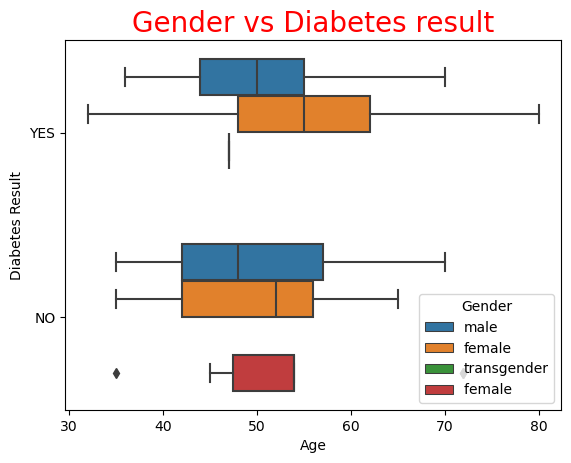

In [20]:
sns.boxplot(x='Age',y='Diabetes Result',data=dt,hue='Gender')
plt.title('Gender vs Diabetes result',color='red',size=20)
plt.show()

<Axes: xlabel='Place(location where the patient lives)', ylabel='Age'>

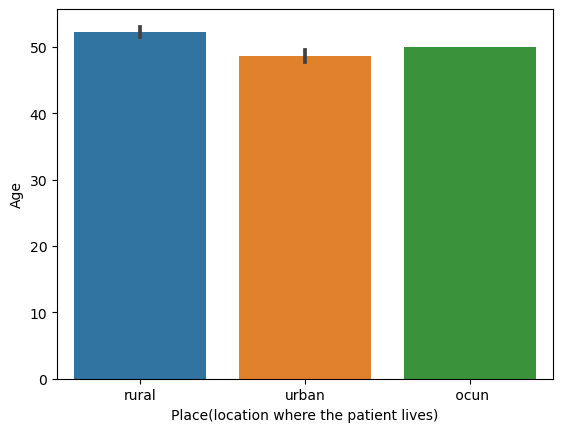

In [21]:
sns.barplot(x=dt['Place(location where the patient lives)'],y=dt['Age'])

Text(0.5, 1.0, 'Place vs Age')

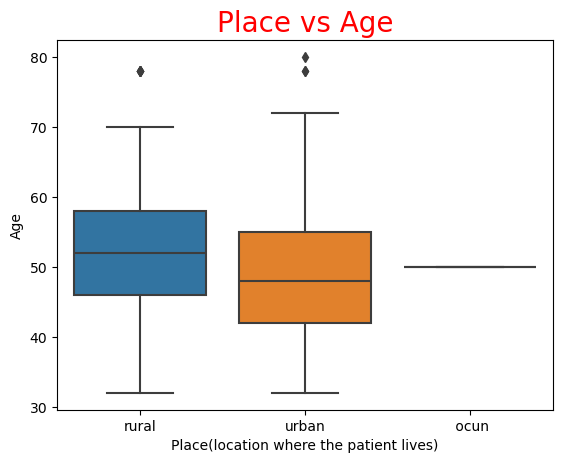

In [22]:
sns.boxplot(x='Place(location where the patient lives)',y='Age',data=dt)
plt.title('Place vs Age',color='red',size=20)

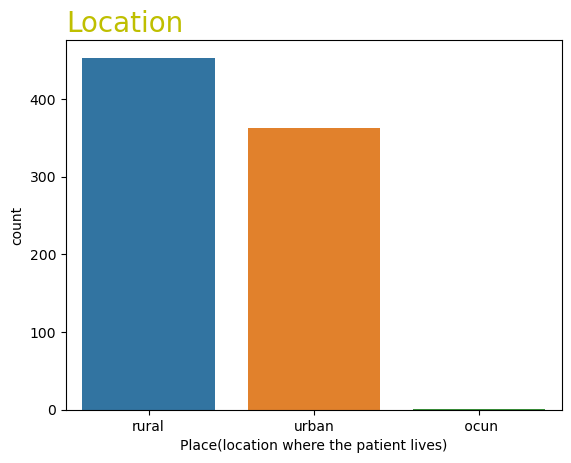

In [23]:
sns.countplot(data=dt,x='Place(location where the patient lives)')
plt.title("Location",color='y',size=20,loc="left")
plt.show()

# BIVARIATE ANALYSIS

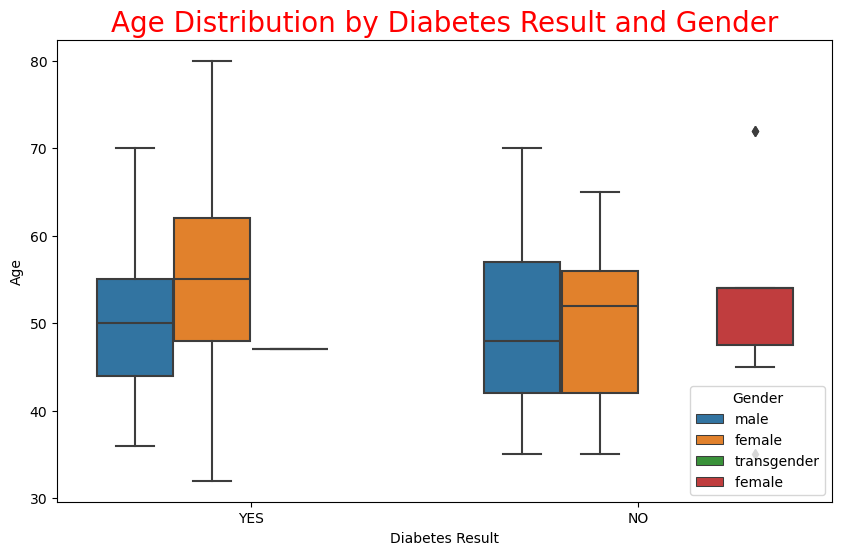

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes Result', y='Age', data=dt, hue='Gender')
plt.title('Age Distribution by Diabetes Result and Gender', color='red', size=20)
plt.xlabel('Diabetes Result')
plt.ylabel('Age')
plt.show()

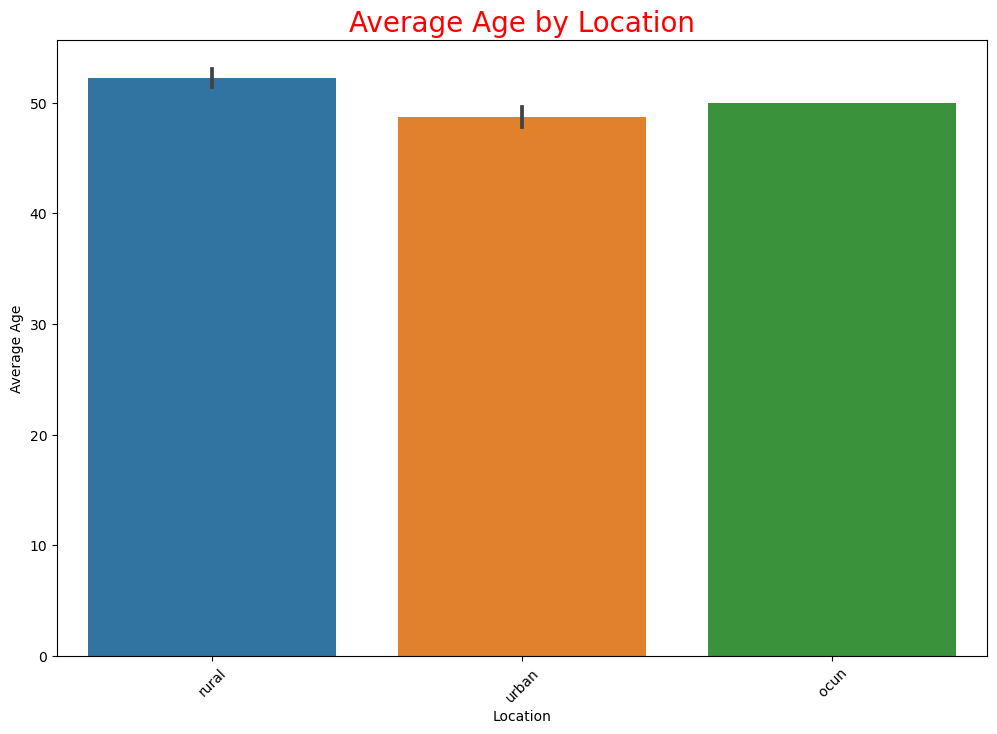

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Place(location where the patient lives)', y='Age', data=dt)
plt.title('Average Age by Location', color='red', size=20)
plt.xlabel('Location')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()

# MULTIVARIATE ANALYSIS

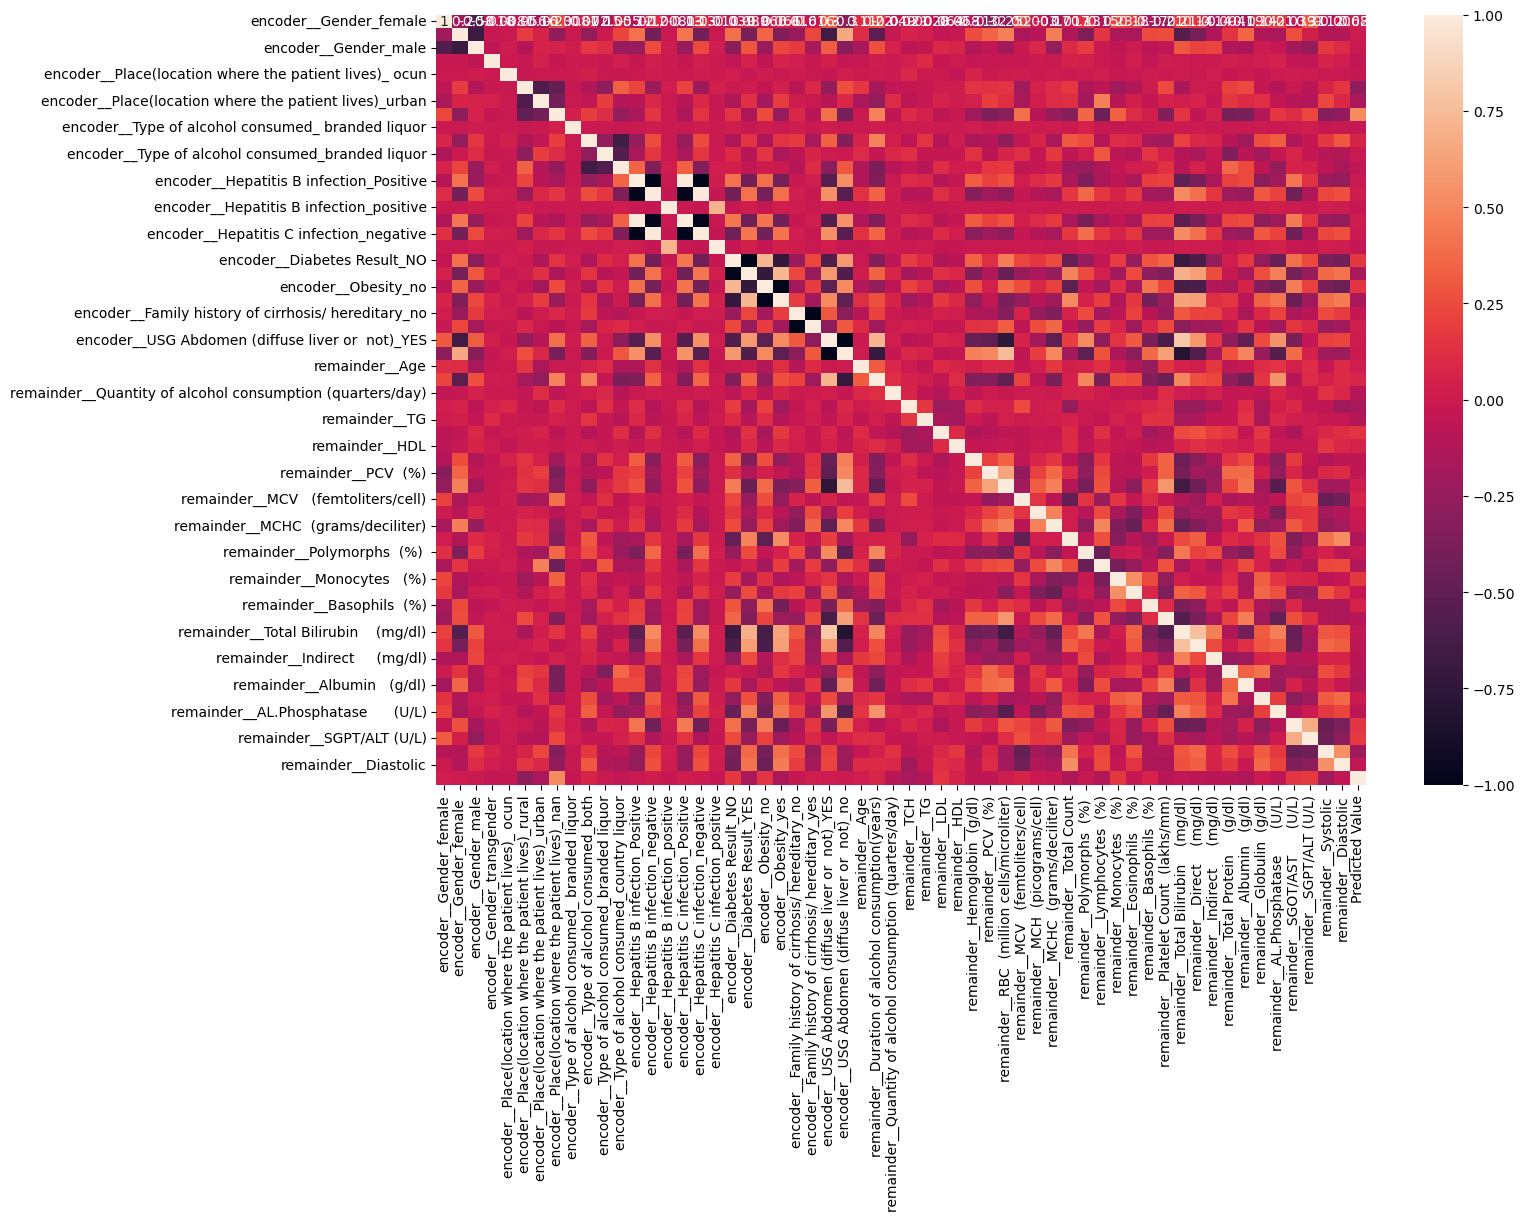

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(normalized_data.corr(),annot=True)
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [18]:
x_train

,encoder__Gender_female,encoder__Gender_female,encoder__Gender_male,encoder__Gender_transgender,encoder__Place(location where the patient lives)_ ocun,encoder__Place(location where the patient lives)_rural,encoder__Place(location where the patient lives)_urban,encoder__Place(location where the patient lives)_nan,encoder__Type of alcohol consumed_ branded liquor,encoder__Type of alcohol consumed_both,...,remainder__Direct (mg/dl),remainder__Indirect (mg/dl),remainder__Total Protein (g/dl),remainder__Albumin (g/dl),remainder__Globulin (g/dl),remainder__AL.Phosphatase (U/L),remainder__SGOT/AST (U/L),remainder__SGPT/ALT (U/L),remainder__Systolic,remainder__Diastolic
1208,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,-0.954709,1.274484,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,-2.284780e-01,0.641342,0.193160,-0.824978,0.907197,0.269563,-0.162504,0.043365
2355,1.967688,-0.108234,-1.871462,-0.072739,-0.032461,-0.954709,-0.784631,2.467702,-0.032461,-0.659580,...,-0.377627,5.112869e-01,-1.251539e+00,-0.775868,-0.185674,-1.264489,-0.250711,-0.625279,-0.789550,-0.669376
482,1.967688,-0.108234,-1.871462,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-0.740473,-1.373787e+00,-4.645689e-01,0.092745,-0.943341,-1.337741,0.263915,-0.050024,-0.413322,-0.669376
1199,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.175888,-4.312503e-01,-1.497810e-01,1.098507,0.117393,-1.703999,0.907197,0.269563,-0.789550,-0.669376
438,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,-0.954709,-0.784631,2.467702,-0.032461,-0.659580,...,-0.014781,1.830839e+00,7.612981e-03,-0.547286,0.571994,-1.264489,-1.601604,-1.232493,0.464542,0.756105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.175888,-4.312503e-01,-1.497810e-01,1.098507,0.117393,-1.703999,0.907197,0.269563,-0.789550,-0.669376
1095,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,1.188068e+00,0.641342,-0.564507,-2.802776,0.907197,0.269563,-0.789550,-0.669376
1130,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,-0.954709,1.274484,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,1.424159e+00,0.641342,-0.337207,-1.557496,0.907197,0.269563,0.464542,0.043365
1294,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,6.371888e-01,0.641342,-0.564507,-1.557496,0.907197,0.269563,-0.789550,-0.669376


In [19]:
y_train

1208    1
2355    2
482     0
1199    1
438     0
       ..
1638    1
1095    1
1130    1
1294    1
860     0
Name: Predicted Value, Length: 2102, dtype: int32

# LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [21]:
x_train

,encoder__Gender_female,encoder__Gender_female,encoder__Gender_male,encoder__Gender_transgender,encoder__Place(location where the patient lives)_ ocun,encoder__Place(location where the patient lives)_rural,encoder__Place(location where the patient lives)_urban,encoder__Place(location where the patient lives)_nan,encoder__Type of alcohol consumed_ branded liquor,encoder__Type of alcohol consumed_both,...,remainder__Direct (mg/dl),remainder__Indirect (mg/dl),remainder__Total Protein (g/dl),remainder__Albumin (g/dl),remainder__Globulin (g/dl),remainder__AL.Phosphatase (U/L),remainder__SGOT/AST (U/L),remainder__SGPT/ALT (U/L),remainder__Systolic,remainder__Diastolic
1208,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,-0.954709,1.274484,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,-2.284780e-01,0.641342,0.193160,-0.824978,0.907197,0.269563,-0.162504,0.043365
2355,1.967688,-0.108234,-1.871462,-0.072739,-0.032461,-0.954709,-0.784631,2.467702,-0.032461,-0.659580,...,-0.377627,5.112869e-01,-1.251539e+00,-0.775868,-0.185674,-1.264489,-0.250711,-0.625279,-0.789550,-0.669376
482,1.967688,-0.108234,-1.871462,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-0.740473,-1.373787e+00,-4.645689e-01,0.092745,-0.943341,-1.337741,0.263915,-0.050024,-0.413322,-0.669376
1199,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.175888,-4.312503e-01,-1.497810e-01,1.098507,0.117393,-1.703999,0.907197,0.269563,-0.789550,-0.669376
438,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,-0.954709,-0.784631,2.467702,-0.032461,-0.659580,...,-0.014781,1.830839e+00,7.612981e-03,-0.547286,0.571994,-1.264489,-1.601604,-1.232493,0.464542,0.756105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.175888,-4.312503e-01,-1.497810e-01,1.098507,0.117393,-1.703999,0.907197,0.269563,-0.789550,-0.669376
1095,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,1.188068e+00,0.641342,-0.564507,-2.802776,0.907197,0.269563,-0.789550,-0.669376
1130,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,-0.954709,1.274484,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,1.424159e+00,0.641342,-0.337207,-1.557496,0.907197,0.269563,0.464542,0.043365
1294,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,6.371888e-01,0.641342,-0.564507,-1.557496,0.907197,0.269563,-0.789550,-0.669376


In [22]:
y_train

1208    1
2355    2
482     0
1199    1
438     0
       ..
1638    1
1095    1
1130    1
1294    1
860     0
Name: Predicted Value, Length: 2102, dtype: int32

# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
x_train

,encoder__Gender_female,encoder__Gender_female,encoder__Gender_male,encoder__Gender_transgender,encoder__Place(location where the patient lives)_ ocun,encoder__Place(location where the patient lives)_rural,encoder__Place(location where the patient lives)_urban,encoder__Place(location where the patient lives)_nan,encoder__Type of alcohol consumed_ branded liquor,encoder__Type of alcohol consumed_both,...,remainder__Direct (mg/dl),remainder__Indirect (mg/dl),remainder__Total Protein (g/dl),remainder__Albumin (g/dl),remainder__Globulin (g/dl),remainder__AL.Phosphatase (U/L),remainder__SGOT/AST (U/L),remainder__SGPT/ALT (U/L),remainder__Systolic,remainder__Diastolic
1208,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,-0.954709,1.274484,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,-2.284780e-01,0.641342,0.193160,-0.824978,0.907197,0.269563,-0.162504,0.043365
2355,1.967688,-0.108234,-1.871462,-0.072739,-0.032461,-0.954709,-0.784631,2.467702,-0.032461,-0.659580,...,-0.377627,5.112869e-01,-1.251539e+00,-0.775868,-0.185674,-1.264489,-0.250711,-0.625279,-0.789550,-0.669376
482,1.967688,-0.108234,-1.871462,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-0.740473,-1.373787e+00,-4.645689e-01,0.092745,-0.943341,-1.337741,0.263915,-0.050024,-0.413322,-0.669376
1199,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.175888,-4.312503e-01,-1.497810e-01,1.098507,0.117393,-1.703999,0.907197,0.269563,-0.789550,-0.669376
438,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,-0.954709,-0.784631,2.467702,-0.032461,-0.659580,...,-0.014781,1.830839e+00,7.612981e-03,-0.547286,0.571994,-1.264489,-1.601604,-1.232493,0.464542,0.756105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.175888,-4.312503e-01,-1.497810e-01,1.098507,0.117393,-1.703999,0.907197,0.269563,-0.789550,-0.669376
1095,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,1.188068e+00,0.641342,-0.564507,-2.802776,0.907197,0.269563,-0.789550,-0.669376
1130,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,-0.954709,1.274484,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,1.424159e+00,0.641342,-0.337207,-1.557496,0.907197,0.269563,0.464542,0.043365
1294,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,6.371888e-01,0.641342,-0.564507,-1.557496,0.907197,0.269563,-0.789550,-0.669376


In [25]:
y_train

1208    1
2355    2
482     0
1199    1
438     0
       ..
1638    1
1095    1
1130    1
1294    1
860     0
Name: Predicted Value, Length: 2102, dtype: int32

# Hyper Parameter

In [26]:
 from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [27]:
k = np.random.randint(1,50,60)

In [28]:
params = {'n_neighbors': k}

In [29]:
random_search = RandomizedSearchCV(knn, params,n_iter=5,cv=5, n_jobs=-1, verbose=0)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'n_neighbors': array([11, 10, 32, 47, 14, 19, 39, 44,  7, 11, 33, 10, 20, 46, 34, 15, 35,
       28, 29,  5, 43, 24, 37, 38, 44, 16,  6, 29, 45, 49, 10, 46, 29, 16,
       34, 35, 34, 39, 46, 47,  9, 33, 37, 24, 32, 14, 11, 14, 14,  3, 35,
       29, 46,  5, 19, 30, 39, 43, 45, 16])})

In [30]:
print('train_score '+ str(random_search.score(x_train,y_train)))
print('test_score '+ str(random_search.score(x_test,y_test)))

train_score 0.8506184586108468
test_score 0.8498098859315589
